In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
dataset = pd.read_csv('knn.csv')

In [3]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,10,7,1
1,15810944,Male,2,3,0
2,15668575,Female,3,2,0
3,15603246,Female,6,4,0
4,15804002,Male,8,6,1


In [35]:
x = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, -1].values

In [32]:
print(x)

[[10  7]
 [ 2  3]
 [ 3  2]
 [ 6  4]
 [ 8  6]
 [ 7  5]
 [ 4  3]
 [ 6  3]
 [ 7  4]
 [ 6  3]]


In [33]:
print(y)

[1 0 0 0 1 1 0 0 1 1]


In [47]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [49]:
len(y_train)

7

In [50]:
len(x_train)

7

In [51]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [52]:
print(x_train)

[[ 0.06225728 -0.70710678]
 [-1.68094658 -0.70710678]
 [-0.80934465 -0.70710678]
 [ 0.06225728 -0.70710678]
 [ 0.06225728  0.        ]
 [ 1.80546114  2.12132034]
 [ 0.49805825  0.70710678]]


In [53]:
print(x_test)

[[-1.24514561 -1.41421356]
 [ 0.49805825  0.        ]
 [ 0.93385921  1.41421356]]


In [54]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, metric = 'minkowski', p=2)
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [55]:
y_pred = classifier.predict(x_test)

In [56]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[1 0]
 [1 1]]


<ipython-input-58-fb8996106adf>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x_set[y_set == j, 0],x_set[y_set == j, 1],


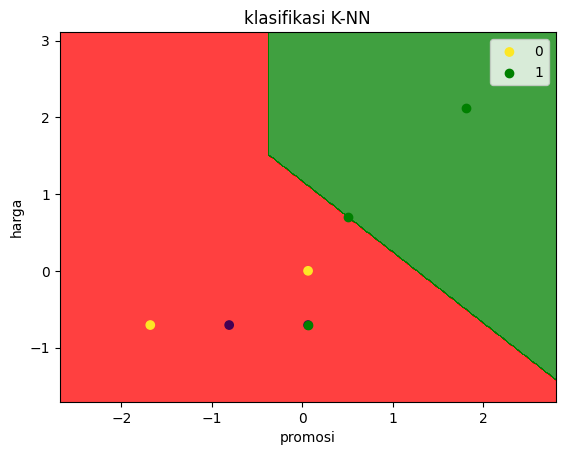

In [58]:
from matplotlib.colors import ListedColormap
x_set,y_set = x_train,y_train
x1,x2 = np.meshgrid(np.arange(start=x_set[:,0].min()-1, stop=x_set[:,0].max()+1, step=0.01),
                    np.arange(start=x_set[:,1].min()-1, stop=x_set[:,1].max()+1, step=0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
            alpha = 0.75, cmap = ListedColormap(('red','green')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate (np.unique(y_set)):
  plt.scatter(x_set[y_set == j, 0],x_set[y_set == j, 1],
              c = ListedColormap(('red','green'))(i),label =j)
plt.title('klasifikasi K-NN')
plt.xlabel('promosi')
plt.ylabel('harga')
plt.legend()
plt.show()